## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# import cufflinks
import cufflinks as cf

% matplotlib inline

UsageError: Line magic function `%` not found.


## Load Dataset

In [9]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Heart.csv", index_col=0)
df.head(20)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [10]:
heart_rate_df = df[df["AHD"] == "Yes"]

In [11]:
counts = heart_rate_df.groupby("ChestPain")["RestBP"].count()

In [14]:
count_df = pd.DataFrame(counts)
count_df.columns = ['Count']
count_df.sort_values(by=['Count'], inplace=True, ascending=False)
count_df.index.name = "ChestPain"
count_df.head()

,Count
ChestPain,
asymptomatic,105
nonanginal,18
nontypical,9
typical,7


In [17]:
cf.go_offline()
count_df.iplot(title="Heart Rate",
               yTitle="Count",
               kind="bar",
               shape=(4,1),
               fill=True)

In [18]:
df['Age'].iplot(kind='hist', bins=20)

In [19]:
# import plotly and offline mode
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
data = []

for col in df['Thal'].unique():
    data.append(go.Box(y=df[df['Thal'] == col]['Age'], name=col, showlegend=True))

iplot(data)

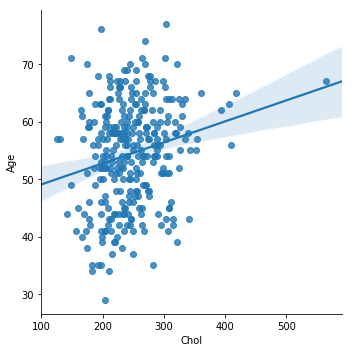

In [21]:
sns.lmplot(x='Chol', y='Age', data=df)